# 实验四: 基于K-近邻的车牌号识别

## 1 案例简介

图像的智能处理一直是人工智能领域广受关注的一类技术，代表性的如人脸识别与 CT 肿瘤识别，在人工智能落地的进程中发挥着重要作用。其中车牌号识别作为一个早期应用场景，已经融入日常生活中，为我们提供了诸多便利，在各地的停车场和出入口都能看到它的身影。车牌号识别往往分为字符划分和字符识别两个子任务，本案例我们将关注字符识别的任务，尝试用 K-NN 的方法对分割好的字符图像进行自动识别和转化。

## 2 作业说明

### 2.1 基本要求
* 完成数据的读入和表示，将图片表示成向量并和 label 对应上；
* 构建 K-NN 模型（可调库）对测试集中的图片进行预测并计算准确率；
* 分析当 K 取不同值时测试准确率的变化。

### 2.2 扩展要求
* 分析不同距离度量方式对模型效果的影响；
* 对比平权和加权 K-NN 的效果；
* 分析训练集大小对测试结果的影响。

## 3 数据概览
本次我们使用已经分割好的车牌图片作为数据集，包括数字 0-9、字母 A-Z（不包含 O 和 I）以及省份简称共 65 个类，编号从 0 到 64。数据已经分成了训练集和测试集，里面的文件夹用 label 编号命名，一个文件夹下的所有图片都属于该文件夹对应的类，每个图片都是 20 * 20 的二值化灰度图。

下面演示一下如何借助 PIL 库将图片转化为向量：

In [1]:
from PIL import Image
img = Image.open('data/train/0/4-3.jpg')  # 打开图片
img  # 显示图片from PIL import Image
img = Image.open('data/train/0/4-3.jpg')  # 打开图片
img  # 显示图片

In [2]:
import numpy as np
pixels = np.array(img)  # 转化为 numpy 矩阵
pixels.shape

(20, 20)

## 4 模型构建

In [3]:
import os
from PIL import Image
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import random

RANDOM_SEED = 2023

path_train = 'data/train'
path_test = 'data/test'

### 4.1数据读取
1. 读取图片

    读取文件夹中指定数量图片

In [4]:
# 读取 num 张图片，将其转换为一维向量
def readImg(path, num = -1):
    count =0
    random.seed(RANDOM_SEED)
    img_array=[]
    for img_name in os.listdir(path):
        img_path = os.path.join(path,img_name)
        img = Image.open(img_path)
        img_array.append(np.array(img).reshape(-1))
    if num > 0 and num < len(img_array):
        img_array = random.sample(img_array,num)
    return img_array

# 测试该函数
folder_path = path_train+'/0'
num = 5
Imgs = readImg(folder_path,num)
len(Imgs)

5

2. 读取文件夹与标签

In [5]:
# 读取文件标签，并返回图片、标签列表
def readFile(path,nums = -1):
    labels =[]
    Imglist = []
    for label in os.listdir(path):
        path_file = os.path.join(path,label)
        Imgs = readImg(path_file,nums)
        Imglist = Imglist + Imgs
        for i in range(len(Imgs)):
            labels.append(label)
    return np.array(Imglist), np.array(labels)

# 测试该函数
nums = 5
x,y = readFile(path_train,nums)
x.shape,y.shape

((325, 400), (325,))

### 4.2 划分数据集

In [6]:
x_train,y_train = readFile(path_train)
x_test,y_test = readFile(path_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape  # 观察训练与测试数据规模

((15954, 400), (15954,), (4665, 400), (4665,))

### 4.3 模型的训练

In [7]:
model = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
model.fit(x_train, y_train)  # 记录训练数据
p_test = model.predict(x_test)  # 预测测试图片
accuracy = accuracy_score(p_test, y_test)  # 计算准确率
print(f'accuracy: {accuracy:.4f}')

accuracy: 0.7031


经过测试，在参数取值为`n_neighbors=3, weights='uniform', algorithm='auto'`时，预测准确率为0.7031

## 5 模型优化
* 分析当 K 取不同值时测试准确率的变化；
* 分析不同距离度量方式对模型效果的影响；
* 对比平权和加权 K-NN 的效果；
* 分析训练集大小对测试结果的影响。

### 5.1 不同K值对准确率的变化

K: 1, accuracy: 0.7168
K: 2, accuracy: 0.7220
K: 3, accuracy: 0.7031
K: 4, accuracy: 0.7074
K: 5, accuracy: 0.6969
K: 6, accuracy: 0.6965
K: 7, accuracy: 0.6956
K: 8, accuracy: 0.6924
K: 9, accuracy: 0.6913
K: 10, accuracy: 0.6911
K: 11, accuracy: 0.6898
K: 12, accuracy: 0.6857
K: 13, accuracy: 0.6825
K: 14, accuracy: 0.6806
K: 15, accuracy: 0.6776
K: 16, accuracy: 0.6742
K: 17, accuracy: 0.6707
K: 18, accuracy: 0.6686
K: 19, accuracy: 0.6662
K: 20, accuracy: 0.6673


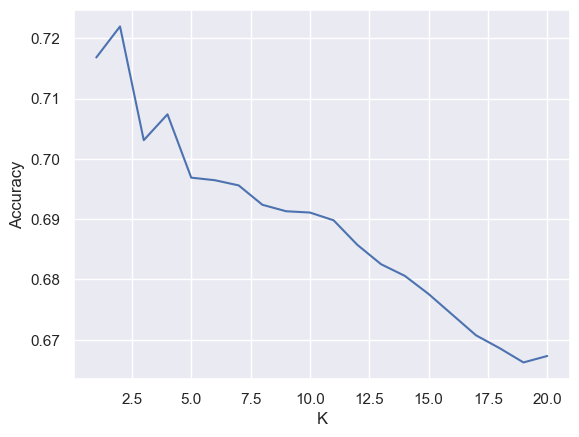

In [8]:
k_range = range(1,21)
acc_list = []
sns.set()

for k in k_range:  # 遍历邻居的个数 k
    model = KNeighborsClassifier(k)
    model.fit(x_train, y_train)  # 记录训练数据
    p_test = model.predict(x_test)  # 预测测试图片
    accuracy = accuracy_score(p_test, y_test)  # 计算准确率
    acc_list.append(accuracy)
    print('K: {}, accuracy: {:<.4f}'.format(k, accuracy))
    
plt.plot(k_range, acc_list)  # 画图
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

由上图可知，在k值取2时准确率最高，随着k值增大，模型准确率程降低趋势

### 5.2 不同距离度量对模型效果变化

通过改变 `metric` 参数来测试不同的距离度量。
- `minkowski`:闵可夫斯基距离，默认距离度量。
    ![minkowski](https://img-blog.csdnimg.cn/20210606140941641.png#pic_center)
- `euclidean`:欧几里得距离，两个数值向量点之间的长度
    ![euclidean](https://img-blog.csdnimg.cn/20210606140530231.png#pic_center)
- `manhattan`:曼哈顿距离，又称城市街区距离，它的计算方式有点类似于只能90度拐角的街道长度。

    ![manhattan](https://img-blog.csdnimg.cn/20210606140814941.png#pic_center)
- `chebyshev`:chebyshev距离是两个数值向量在单个维度上绝对值差值最大的那个值
    ![chebyshev](https://img-blog.csdnimg.cn/20210606140912741.png#pic_center)

In [9]:
metrics = ['minkowski', 'euclidean', 'manhattan', 'chebyshev' ]
acc_list = []

for metric in metrics:  # 遍历距离度量类型
    model = KNeighborsClassifier(metric = metric)
    model.fit(x_train, y_train)  # 记录训练数据
    p_test = model.predict(x_test)  # 预测测试图片
    accuracy = accuracy_score(p_test, y_test)  # 计算准确率
    acc_list.append(accuracy)
    print('metric: {}, accuracy: {:<.4f}'.format(metric, accuracy))


metric: minkowski, accuracy: 0.6969
metric: euclidean, accuracy: 0.6969
metric: manhattan, accuracy: 0.6920
metric: chebyshev, accuracy: 0.4090


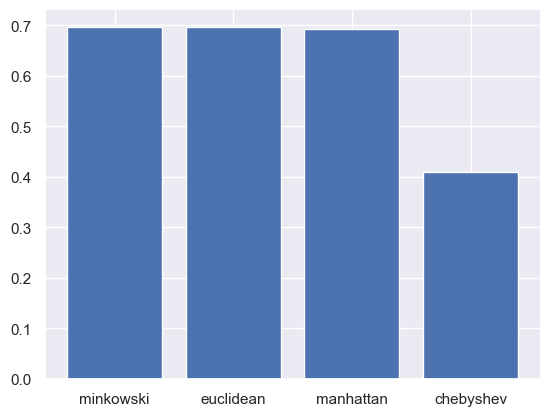

In [10]:
plt.bar(metrics, acc_list)  # 画图
plt.show()

由上图可见，`minkowski`, `euclidean`, `manhattan`三种举例向量效果类似， `chebyshev`效果明显较差。

### 5.3 平均和加权KNN的区别

- `uniform`: 平均KNN，这意味着所有的邻居节点在投票过程中具有相同的权重。也就是说，每个邻居节点对最终结果的影响是一样的，不考虑它们与查询点的距离。

- `distance`:加权KNN，这意味着邻居节点的权重与它们到查询点的距离成反比。也就是说，距离查询点更近的邻居节点将对最终结果有更大的影响，而距离较远的邻居节点的影响较小。


In [11]:
weights = ['uniform', 'distance']
acc_list = []

for weight in weights:
    model = KNeighborsClassifier(weights = weight)
    model.fit(x_train, y_train)  # 记录训练数据
    p_test = model.predict(x_test)  # 预测测试图片
    accuracy = accuracy_score(p_test, y_test)  # 计算准确率
    acc_list.append(accuracy)
    print('metric: {}, accuracy: {:<.4f}'.format(metric, accuracy))

metric: chebyshev, accuracy: 0.6969
metric: chebyshev, accuracy: 0.7016


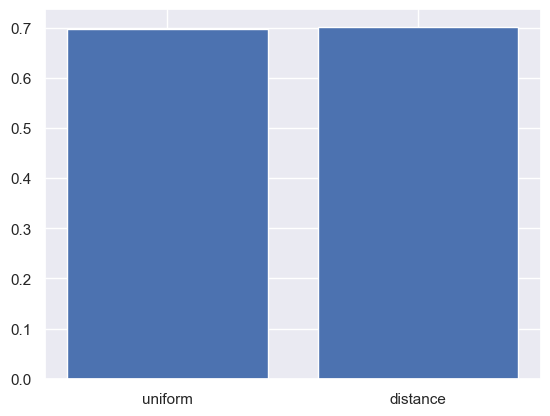

In [12]:
plt.bar(weights, acc_list)  # 画图
plt.show()

由上图可见，平均与加权结果类似，加权效果较好于平均KNN。

### 5.4 训练集大小对模型效果的影响

In [15]:
train_range = [1, 5, 10, 20, 50, 100, 200, 400, 600]
acc_lst = list()

for train_num in train_range:
    x_train, y_train = readFile(path_train, train_num)
    model = KNeighborsClassifier()
    model.fit(x_train, y_train)
    p_test = model.predict(x_test)
    accuracy = accuracy_score(p_test, y_test)
    acc_lst.append(accuracy)
    print('train: {}, accuracy: {:<.4f}'.format(train_num, accuracy))

train: 1, accuracy: 0.1972
train: 5, accuracy: 0.4264
train: 10, accuracy: 0.5035
train: 20, accuracy: 0.5906
train: 50, accuracy: 0.6568
train: 100, accuracy: 0.6707
train: 200, accuracy: 0.7005
train: 400, accuracy: 0.7065
train: 600, accuracy: 0.7025


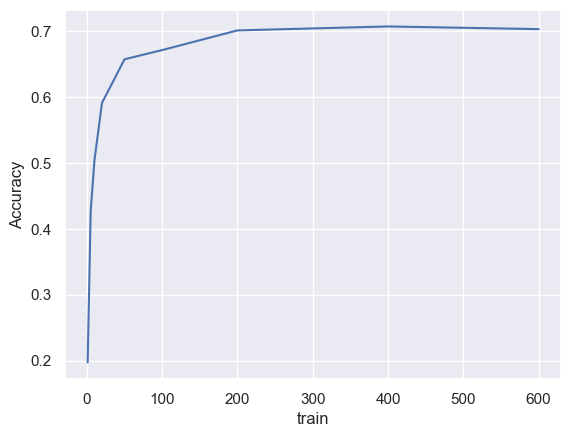

In [17]:
plt.plot(train_range, acc_lst)
plt.xlabel('train')
plt.ylabel('Accuracy')
plt.show()

由上图可见，数据集数量越大，准确率越高，但是达到一定大小后增长变缓，甚至会有略微降低。